# Population

## 1. 배경

- 목표

  1.인구 소멸 위기 지역 파악
  
  2.인구 소멸 위기 지역의 지도 표현
  
  3.지도 표현에 대한 카르토그램 표현

## 2. 데이터 읽고 인구 소멸 지역 계산하기

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

warnings.filterwarnings(action = "ignore")
%matplotlib inline

In [2]:
population = pd.read_excel("../data/07_population_raw_data.xlsx")
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12
0,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,전국,소계,총인구수 (명),51696216,3541061,3217367,3517868,4016272,2237345,1781229,1457890,909130,416164,141488,34844,17562
2,NaN,NaN,남자인구수 (명),25827594,1877127,1682988,1806754,2045265,1072395,806680,600607,319391,113221,32695,7658,4137
3,NaN,NaN,여자인구수 (명),25868622,1663934,1534379,1711114,1971007,1164950,974549,857283,589739,302943,108793,27186,13425
4,서울특별시,소계,총인구수 (명),9930616,690728,751973,803507,817467,448956,350580,251961,141649,66067,24153,7058,5475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,NaN,NaN,남자인구수 (명),235977,17377,13118,15084,18350,8474,6782,4941,2737,854,226,53,17
843,NaN,NaN,여자인구수 (명),234688,15261,12245,14687,18062,9265,7877,7178,5649,3122,1387,460,137
844,NaN,서귀포시,총인구수 (명),170932,10505,8067,9120,11606,8686,7460,6456,4521,1855,733,242,77
845,NaN,NaN,남자인구수 (명),86568,5600,4247,4693,6082,4237,3441,2611,1494,370,103,29,9


In [3]:
population = pd.read_excel("../data/07_population_raw_data.xlsx", header = 1)
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,NaN,NaN,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,NaN,NaN,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,NaN,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,NaN,NaN,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


## fillna()

In [4]:
datas = {
    "A" : np.random.randint(1,45,8),
    "B" : np.random.randint(1,45,8),
    "C" : np.random.randint(1,45,8),
}
datas

{'A': array([17, 19, 20, 32,  2, 34,  8, 12]),
 'B': array([10, 41,  5, 11, 25, 20,  1,  3]),
 'C': array([11,  2, 31, 41, 42,  5, 24, 42])}

In [5]:
fillna_df = pd.DataFrame(datas)
fillna_df

,A,B,C
0,17,10,11
1,19,41,2
2,20,5,31
3,32,11,41
4,2,25,42
5,34,20,5
6,8,1,24
7,12,3,42


In [6]:
fillna_df.loc[2:4, ["A"]] = np.nan
fillna_df.loc[3:5, ["B"]] = np.nan
fillna_df.loc[4:7, ["C"]] = np.nan
fillna_df

,A,B,C
0,17.0,10.0,11.0
1,19.0,41.0,2.0
2,NaN,5.0,31.0
3,NaN,NaN,41.0
4,NaN,NaN,NaN
5,34.0,NaN,NaN
6,8.0,1.0,NaN
7,12.0,3.0,NaN


In [7]:
fillna_df.fillna(method = "pad") # pad 옵션은 nan을 이전 값으로 채워준다.

,A,B,C
0,17.0,10.0,11.0
1,19.0,41.0,2.0
2,19.0,5.0,31.0
3,19.0,5.0,41.0
4,19.0,5.0,41.0
5,34.0,5.0,41.0
6,8.0,1.0,41.0
7,12.0,3.0,41.0


In [8]:
fillna_df.fillna(method = "pad", axis = 1) # 가로축으로도 채워넣을 수 있다.

,A,B,C
0,17.0,10.0,11.0
1,19.0,41.0,2.0
2,NaN,5.0,31.0
3,NaN,NaN,41.0
4,NaN,NaN,NaN
5,34.0,34.0,34.0
6,8.0,1.0,1.0
7,12.0,3.0,3.0


In [9]:
population.fillna(method = "pad", inplace = True) # 행정구역 컬럼들에 nan값을 이전값으로 채워줌
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0


In [10]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [11]:
# 컬럼 이름 변경

population.rename(
    columns = {
        "행정구역(동읍면)별(1)" : "광역시도",
        "행정구역(동읍면)별(2)" : "시도",
        "계" : "인구수"
    }, inplace = True
)
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [12]:
# 소계 제거
population = population[population["시도"] != "소계"]
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [13]:
# 항목 컬럼명 변경
population.is_copy = False

population.rename(
    columns = {"항목" : "구분"}, inplace = True
)
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [14]:
# 구분 컬럼 내 데이터 명을 쉽게 정리
    # 총인구수 (명) -> 합계
    # 남자인구수 (명) -> 남자
    # 여자인구수 (명) -> 여자
                #  행                                   , 열
population.loc[population["구분"] == "총인구수 (명)", "구분"] = "합계"
population.loc[population["구분"] == "남자인구수 (명)", "구분"] = "남자"
population.loc[population["구분"] == "여자인구수 (명)", "구분"] = "여자"

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [15]:
# 소멸 지역을 조사하기 위한 데이터 열 생성
# 20-39세 여성 인구, 65세 이상 노인 인구

population["20-39세"] = (
    population["20 - 24세"] + population["25 - 29세"] + population["30 - 34세"] + population["35 - 39세"] 
)

population["65세이상"] = (
    population["65 - 69세"] + population["70 - 74세"] + population["75 - 79세"] + population["80 - 84세"] + 
    population["85 - 89세"] + population["90 - 94세"] + population["100+"]
)

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24716.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10806.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,13910.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20230.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8796.0


In [16]:
# pivot_table

pop = pd.pivot_table(
    data = population,
    index = ["광역시도", '시도'],
    columns = ["구분"],
    values = ["인구수", "20-39세", "65세이상"]
)
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15718.0  21731.0  37449.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2890.0   4204.0   7094.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6379.0   8679.0  15058.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5882.0   8668.0  14550.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5116.0   7578.0  12694.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4718.0   6538.0  11256.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8405.0  11825.0  20230.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37805.0  53292.0  91097.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14376.0  20248.0  34624.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9765.0  13580.0  23345.0  127647.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0  
...            ...       ...  
충청북도 진천군   33563.0   69950.0  
     청원구   93807.0  190813.0  
     청주시  415874.0  835197.0  
     충주시  103473.0  208350.0  
     흥덕구  125916.0  253563.0  

[264 rows x 9 columns]

In [17]:
# 소멸 비율 계산
# 65세 이상 노인 인구와 20-39세 여성 인구를 비교해 
# 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 "소멸 위험 지역"으로 분류

pop["소멸비율"] = pop["20-39세", "여자"] / (pop["65세이상", "합계"] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15718.0  21731.0  37449.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2890.0   4204.0   7094.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6379.0   8679.0  15058.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5882.0   8668.0  14550.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5116.0   7578.0  12694.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.233571  
     고성군   14215.0   30114.0  0.712997  
     동해시   46131.0   93297.0  1.295391  
     삼척시   34346.0   69599.0  0.978007  
     속초시   41505.0   81793.0  1.378919

In [18]:
# 소멸비율이 1 미만인 경우 소멸위기지역으로 분류
pop["소멸위기지역"] = pop["소멸비율"] < 1.0
pop

20-39세                        65세이상                         인구수  \
구분              남자        여자        합계       남자       여자       합계        남자   
광역시도 시도                                                                       
강원도  강릉시   26286.0   23098.0   49384.0  15718.0  21731.0  37449.0  106231.0   
     고성군    4494.0    2529.0    7023.0   2890.0   4204.0   7094.0   15899.0   
     동해시   11511.0    9753.0   21264.0   6379.0   8679.0  15058.0   47166.0   
     삼척시    8708.0    7115.0   15823.0   5882.0   8668.0  14550.0   35253.0   
     속초시    9956.0    8752.0   18708.0   5116.0   7578.0  12694.0   40288.0   
...            ...       ...       ...      ...      ...      ...       ...   
충청북도 진천군    9391.0    7622.0   17013.0   4718.0   6538.0  11256.0   36387.0   
     청원구   32216.0   27805.0   60021.0   8405.0  11825.0  20230.0   97006.0   
     청주시  128318.0  115719.0  244037.0  37805.0  53292.0  91097.0  419323.0   
     충주시   26600.0   22757.0   49357.0  14376.0  20248.0  34624.0  104877.0   
     흥덕구   40933.0   37675.0   78608.0   9765.0  13580.0  23345.0  127647.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.233571  False  
     고성군   14215.0   30114.0  0.712997   True  
     동해시   46131.0   93297.0  1.295391  False  
     삼척시   34346.0   69599.0  0.978007   True  
     속초시   41505.0   81793.0  1.378919  False  
...            ...       ...       ...    ...  
충청북도 진천군   33563.0   69950.0  1.354300  False  
     청원구   93807.0  190813.0  2.748888  False  
     청주시  415874.0  835197.0  2.540567  False  
     충주시  103473.0  208350.0  1.314522  False  
     흥덕구  125916.0  253563.0  3.227672  False  

[264 rows x 11 columns]

In [19]:
# 소멸위기지역 조회

pop[pop["소멸위기지역"] == True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [20]:
pop.reset_index(inplace = True)
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15718.0  21731.0  37449.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2890.0   4204.0   7094.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6379.0   8679.0  15058.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5882.0   8668.0  14550.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5116.0   7578.0  12694.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.233571  False  
1    14215.0   30114.0  0.712997   True  
2    46131.0   93297.0  1.295391  False  
3    34346.0   69599.0  0.978007   True  
4    41505.0   81793.0  1.378919  False

In [21]:
len(pop.columns.get_level_values(0)), pop.columns.get_level_values(0)

(13,
 Index(['광역시도', '시도', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상', '65세이상',
        '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역'],
       dtype='object'))

In [22]:
pop.columns.get_level_values(0)[1]

'시도'

In [23]:
# 멀티 컬럼 정리

tmp_columns = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))    
]
tmp_columns

['광역시도',
 '시도',
 '20-39세남자',
 '20-39세여자',
 '20-39세합계',
 '65세이상남자',
 '65세이상여자',
 '65세이상합계',
 '인구수남자',
 '인구수여자',
 '인구수합계',
 '소멸비율',
 '소멸위기지역']

In [24]:
pop.columns = tmp_columns
pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15718.0,21731.0,37449.0,106231.0,107615.0,213846.0,1.233571,False
1,강원도,고성군,4494.0,2529.0,7023.0,2890.0,4204.0,7094.0,15899.0,14215.0,30114.0,0.712997,True
2,강원도,동해시,11511.0,9753.0,21264.0,6379.0,8679.0,15058.0,47166.0,46131.0,93297.0,1.295391,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5882.0,8668.0,14550.0,35253.0,34346.0,69599.0,0.978007,True
4,강원도,속초시,9956.0,8752.0,18708.0,5116.0,7578.0,12694.0,40288.0,41505.0,81793.0,1.378919,False


## 3. 지도 시각화를 위한 지역별 ID 만들기

In [25]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [26]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [27]:
# 지역별 ID를 넣을 값

si_name = [None] * len(pop)
si_name

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [28]:
pop["광역시도"].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [29]:
pop["시도"].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

"""
"광역시도" 컬럼에는 '광역시'와 '도' 이름이 있는데,

'광역시'는 광역시 이름을 넣어준 후 "시도" 컬럼의 '구'이름을 덧붙여줄 것이고 
서울 중구, 서울 서초, 인천 남동

'도'는 도 이름이 아닌 '시'이름을 붙인 후, '구/군' 이름을 덧붙여주고자 한다.
포항 북구, 안양 만안, 안산 단원

통영, 남양주
"""

### (1) 일반 시 이름과 세종시, 광역시도 일반 구 정리

In [30]:
pop["광역시도"]

0       강원도
1       강원도
2       강원도
3       강원도
4       강원도
       ... 
259    충청북도
260    충청북도
261    충청북도
262    충청북도
263    충청북도
Name: 광역시도, Length: 264, dtype: object

In [31]:
# (1)
pop[pop["시도"] == "의정부시"]

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
56,경기도,의정부시,60876.0,58697.0,119573.0,23382.0,31759.0,55141.0,216400.0,222057.0,438457.0,2.128978,False


In [32]:
# (2)
pop[pop["광역시도"] == "세종특별자치시"]

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
176,세종특별자치시,세종특별자치시,35826.0,36648.0,72474.0,10031.0,14052.0,24083.0,121505.0,121543.0,243048.0,3.043475,False


In [33]:
# (3)
text1 = "서울특별시"
text2 = "중구"

text1[:2] + " " + text2

'서울 중구'

In [34]:
text1 = "서울특별시"
text2 = "용산구"

text1[:2] + " " + text2[:-1]

'서울 용산'

In [35]:
for idx, row in pop.iterrows():
    # (1) 광역시도 데이터의 마지막 세글자가 "광역시", "특별시", "자치시" 가 아닌 경우
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]:
        # 시도 컬럼의 마지막 글자만 빼고 넣어줘라
        # 의정부
        si_name[idx] = row["시도"][:-1]
    
    # (2) "세종특별자치시" -> "세종"   
    elif row["광역시도"] == "세종특별자치시":
        si_name[idx] = "세종"
        
    # (3) 광역시도 데이터의 마지막 세글자가 "광역시", "특별시", "자치시"인 경우 
    else:
        # 중구
        if len(row["시도"]) == 2:
            # 서울 중구
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"]
        # 용산구
        else:
            # 서울 용산
            si_name[idx] = row["광역시도"][:2] + " " + row["시도"][:-1]

In [36]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '권선',
 '기흥',
 '김포',
 '남양주',
 '단원',
 '덕양',
 '동두천',
 '동안',
 '만안',
 '부천',
 '분당',
 '상록',
 '성남',
 '소사',
 '수원',
 '수정',
 '수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '영통',
 '오산',
 '오정',
 '용인',
 '원미',
 '의왕',
 '의정부',
 '이천',
 '일산동',
 '일산서',
 '장안',
 '중원',
 '처인',
 '파주',
 '팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '마산합포',
 '마산회원',
 '밀양',
 '사천',
 '산청',
 '성산',
 '양산',
 '의령',
 '의창',
 '진주',
 '진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '남',
 '문경',
 '봉화',
 '북',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전

### (2) 행정구

In [37]:
# https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EA%B5%AC_%EB%AA%A9%EB%A1%9D
# 위 사이트를 기준으로 정리한 ('구'를 가지고 있는)'시' 이름

tmp_gu_dict = {
    "수원": ["장안구", "권선구", "팔달구", "영통구"],
    "성남": ["수정구", "중원구", "분당구"],
    "안양": ["만안구", "동안구"],
    "안산": ["상록구", "단원구"],
    "고양": ["덕양구", "일산동구", "일산서구"],
    "용인": ["처인구", "기흥구", "수지구"],
    "청주": ["상당구", "서원구", "흥덕구", "청원구"],
    "천안": ["동남구", "서북구"],
    "전주": ["완산구", "덕진구"],
    "포항": ["남구", "북구"],
    "창원": ["의창구", "성산구", "진해구", "마산합포구", "마산회원구"],
    "부천": ["오정구", "원미구", "소사구"],
}

In [38]:
for idx, row in pop.iterrows():
    # 광역시도 데이터의 마지막 세글자가 "광역시", "특별시", "자치시" 가 아닌 경우
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]:
        for keys, values in tmp_gu_dict.items():
            # row["시도"] 가 tmp_gu_dict 의 value 값에 있다면                  
            if row["시도"] in values:  # 예) (1)남구 , (2)마산합포구 , (3)장안구    
                # (1) row["시도"] 의 길이가 2인 경우는 
                # 남구 -> 포항 남구
                if len(row["시도"]) == 2:
                    # 시 이름 + 시도 이름을 붙여줘라.
                    si_name[idx] = keys + " " + row["시도"]
                    
                # (2) row["시도"]가 "마산합포구", "마산회원구"인 경우는 
                # 마산합포구 -> 창원 합포
                elif row["시도"] in ["마산합포구", "마산회원구"]:
                    # 시 이름 + ('합포', '회원')을 붙여줘라. 
                    si_name[idx] = keys + " " + row["시도"][2:-1]
                    
                # (3) 나머지 경우는 
                # 장안구 ->  수원 장안
                else:
                    # 시 이름 + '구'를 뺀 시도 이름을 붙여줘라.
                    si_name[idx] = keys + " " + row["시도"][:-1]

In [39]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 

### (3) 고성군

In [40]:
# 고성군에 대하여 한번 더 정리

for idx, row in pop.iterrows():
    if row["광역시도"][-3:] not in ["광역시", "특별시", "자치시"]:
        # row["시도"]의 끝자리가 '고성' 이며 row["광역시도"] 가 '강원도'인 경우
        if row["시도"][:-1] == "고성" and row["광역시도"] == "강원도":
            si_name[idx] = "고성(강원)"
            
         # row["시도"]의 끝자리가 '고성' 이며 row["광역시도"] 가 '경상남도'인 경우
        elif row["시도"][:-1] == "고성" and row["광역시도"] == "경상남도": 
            si_name[idx] = "고성(경남)"

In [41]:
# ID를 데이터프레임에 넣어주기

pop["ID"] = si_name
pop

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15718.0,21731.0,37449.0,106231.0,107615.0,213846.0,1.233571,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2890.0,4204.0,7094.0,15899.0,14215.0,30114.0,0.712997,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6379.0,8679.0,15058.0,47166.0,46131.0,93297.0,1.295391,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5882.0,8668.0,14550.0,35253.0,34346.0,69599.0,0.978007,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5116.0,7578.0,12694.0,40288.0,41505.0,81793.0,1.378919,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,9391.0,7622.0,17013.0,4718.0,6538.0,11256.0,36387.0,33563.0,69950.0,1.354300,False,진천
260,충청북도,청원구,32216.0,27805.0,60021.0,8405.0,11825.0,20230.0,97006.0,93807.0,190813.0,2.748888,False,청주 청원
261,충청북도,청주시,128318.0,115719.0,244037.0,37805.0,53292.0,91097.0,419323.0,415874.0,835197.0,2.540567,False,청주
262,충청북도,충주시,26600.0,22757.0,49357.0,14376.0,20248.0,34624.0,104877.0,103473.0,208350.0,1.314522,False,충주


In [42]:
# 필요한 데이터만 남기기

del pop["20-39세남자"]
del pop["65세이상남자"]
del pop["65세이상여자"]

pop

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37449.0,106231.0,107615.0,213846.0,1.233571,False,강릉
1,강원도,고성군,2529.0,7023.0,7094.0,15899.0,14215.0,30114.0,0.712997,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15058.0,47166.0,46131.0,93297.0,1.295391,False,동해
3,강원도,삼척시,7115.0,15823.0,14550.0,35253.0,34346.0,69599.0,0.978007,True,삼척
4,강원도,속초시,8752.0,18708.0,12694.0,40288.0,41505.0,81793.0,1.378919,False,속초
...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,7622.0,17013.0,11256.0,36387.0,33563.0,69950.0,1.354300,False,진천
260,충청북도,청원구,27805.0,60021.0,20230.0,97006.0,93807.0,190813.0,2.748888,False,청주 청원
261,충청북도,청주시,115719.0,244037.0,91097.0,419323.0,415874.0,835197.0,2.540567,False,청주
262,충청북도,충주시,22757.0,49357.0,34624.0,104877.0,103473.0,208350.0,1.314522,False,충주


### 4. 지도 그리기(카르토그램)

In [43]:
# 대한민국 지도를 그린 엑셀 파일

draw_korea_raw = pd.read_excel("../data/07_draw_korea_raw.xlsx")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [44]:
draw_korea_raw.stack() # 각 데이터의 좌표를 구할 수 있음

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 252, dtype: object

In [45]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [46]:
draw_korea_raw_stacked.reset_index(inplace = True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [47]:
draw_korea_raw_stacked.rename(
    columns = {
        "level_0" : "y",
        "level_1" : "x",
        0 : "ID"
    }, inplace = True
)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [48]:
draw_korea = draw_korea_raw_stacked

In [49]:
# 각 행정구의 경계선 추출

BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

In [50]:
draw_korea["ID"][13]

'고양 일산동'

In [51]:
draw_korea["ID"][0]

'철원'

In [52]:
draw_korea["ID"][13].split()

['고양', '일산동']

In [53]:
# (1)
draw_korea["ID"][13].split()[0]

'고양'

In [54]:
draw_korea["ID"][13].split()[1]

'일산동'

In [55]:
draw_korea["ID"][13][:2]

'고양'

In [56]:
draw_korea["ID"][13][1:2]

'양'

In [57]:
# (2)
txt = "서울\n강남" 
txt.splitlines() # 줄바꿈 기호를 기준으로 쪼개줌

['서울', '강남']

In [58]:
txt = "의정부" 
txt.splitlines() # 줄바꿈 기호를 기준으로 쪼개줌

['의정부']

- 직접 그리기 전, test 함수

In [59]:
# 원본 엑셀 파일 지도 이름 형태와 데이터프레임 지도 이름 형태를 맞춰주는 함수

"""
현재 데이터프레임을 보면 "고양 덕양"와 같이 원본 엑셀 파일에서는
고양
덕양
과 같이 긴 문자열들은 한 줄 내려간 형태로 이름이 표시되었다.
"""

def plot_text_simple(draw_korea):
    # dispname : 지도에 표시할 내용
    
    for idx, row in draw_korea.iterrows():
        
        '''
        Step1. 들어갈 내용 정리
        '''
        # 공백을 기준으로 나누었을 때 문자열이 2개라면
        if len(row["ID"].split()) == 2:
            # 고양
            # 덕양
            # 과 같이 한 줄 내려줘라.   # (1) 참고
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        
        # 고성(강원), 고성(경남)은 "고성"으로 표시
        # 왜냐하면 지도로 보는 고성은 강원인지 경남인지 구분 가능하니깐!
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        
        # 나머지 지역 이름은 그대로 표시
        else:
            dispname = row["ID"]
            
        
        '''
        Step2. 폰트 크기 및 간격 조절
        '''
            # (2) 참고
        if len(dispname.splitlines()[-1]) >= 3: # 길이가 3 이상(서귀포)이라면
            fontsize, linespacing = 9.5, 1.5 # 폰트를 작게
        
        else:
            fontsize, linespacing = 11, 1.2
            
            
    
        '''
        Step3. 지도에 직접 표시
        Signature:
        plt.annotate(
            text,
            xy,
        )
        Docstring:
        Annotate the point *xy* with text *text*.
        matplotlib에서 주석을 이용하면 글씨를 쓸 수 있음!
        '''
        plt.annotate(
            dispname,
            (row["x"] + 0.5 , row["y"] + 0.5),
            weight = "bold",
            fontsize = fontsize,
            linespacing = linespacing,
            ha = "center", # 수평 정렬
            va = "center"  # 수직 정렬
        )

In [60]:
def simpleDraw(draw_korea):
    plt.figure(figsize = (8,11))
    
    plot_text_simple(draw_korea)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path) # 리스트 안에 리스트를 기준으로 y좌표를 한 곳에, x좌표를 한 곳에 모아둠
        plt.plot(xs , ys, c = "black", lw = 1.5)
        
    # y좌표를 위에서 아래로 내려가게 해줌
    '''
    보통 그래프는 아래에서 위로 올라간다.
    하지만 좌표를 그릴 때 위에서 아래로 내려가는 형태로 그렸으므로
    y축을 뒤집어주는 해당 작업을 해줘야한다.
    안 해주면.. 서귀포가 북쪽에 있는 형태가 나옴
    '''
    plt.gca().invert_yaxis() 
    plt.axis("off") # 모든 축과 라벨을 제거하는 기능
    plt.tight_layout() # 그래프 요소들 간에 겹치지 않게끔 간격을 주는 기능
    
    plt.show()

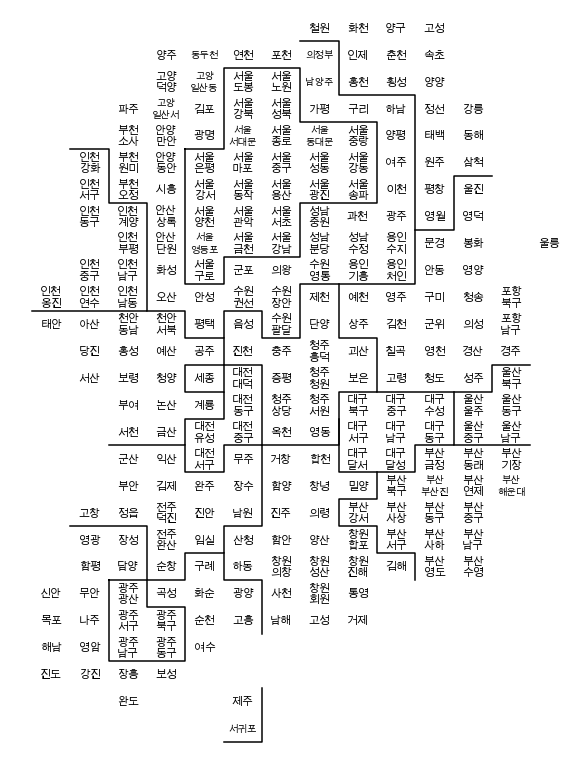

In [61]:
simpleDraw(draw_korea)

### 마지막으로 색깔을 집어넣기 전 검증 작업

In [62]:
# 지도에서 이미 pop 데이터프레임의 ID 이름에 맞게 지역명을 작성해뒀으므로
# 차집합이 없어야 정상!

set(draw_korea["ID"].unique()) - set(pop["ID"].unique())

set()

In [63]:
# 반대로도 해보자.

set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

반대로도 한 값도 차집합이 없도록 만들어야 한다.

In [64]:
pop[pop["ID"].str.contains("부천")]

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
34,경기도,부천시,125233.000000,258286.000000,85813.000000,425101.000000,426279.0,851380.000000,2.918742,False,부천
38,경기도,소사구,41744.333333,86095.333333,28604.333333,141700.333333,142093.0,283793.333333,2.918742,False,부천 소사
52,경기도,오정구,41744.333333,86095.333333,28604.333333,141700.333333,142093.0,283793.333333,2.918742,False,부천 오정
54,경기도,원미구,41744.333333,86095.333333,28604.333333,141700.333333,142093.0,283793.333333,2.918742,False,부천 원미


In [65]:
pop[pop["ID"].str.contains("포항")]

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
98,경상북도,남구,28472.0,63040.0,31384.0,125811.0,118937.0,244748.0,1.814428,False,포항 남구
101,경상북도,북구,31791.0,67836.0,36628.0,135294.0,136733.0,272027.0,1.735885,False,포항 북구
116,경상북도,포항시,60263.0,130876.0,68012.0,261105.0,255670.0,516775.0,1.772128,False,포항


In [66]:
draw_korea[draw_korea["ID"].str.contains("부천")]

,y,x,ID
30,4,2,부천 소사
41,5,2,부천 원미
52,6,2,부천 오정


In [67]:
set(pop["ID"].unique()) - set(draw_korea["ID"].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [68]:
tmp_gu_dict.keys()

dict_keys(['수원', '성남', '안양', '안산', '고양', '용인', '청주', '천안', '전주', '포항', '창원', '부천'])

- 앞서 tmp_gu_dict 로 고쳐주었던 부분때문에 pop 데이터프레임에는 해당 시들의 전체 데이터은 아직 있는 것 같다.
- 우리가 필요한건 각 구별 데이터이기 때문에 전체 데이터는 없어도 되므로 삭제해주자!

In [69]:
tmp_list = list(set(pop["ID"].unique()) - set(draw_korea["ID"].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop["ID"] == tmp].index)

print(set(pop["ID"].unique()) - set(draw_korea["ID"].unique())) #깔끔하게 지워졌다!

set()


### merge()

- 이제 지도를 그리기 위해 지도 데이터프레임과 인구현황 데이터프레임을 합쳐주자

In [70]:
pop = pd.merge(pop, draw_korea, how = "left", on = "ID") # 왼쪽 데이터프레임(pop)을 기준으로 ID를 통해 합쳐주자.
pop.head() # x좌표와 y좌표가 잘 붙었다:)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37449.0,106231.0,107615.0,213846.0,1.233571,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7094.0,15899.0,14215.0,30114.0,0.712997,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15058.0,47166.0,46131.0,93297.0,1.295391,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14550.0,35253.0,34346.0,69599.0,0.978007,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12694.0,40288.0,41505.0,81793.0,1.378919,False,속초,1,10


그림을 그리기 위한 데이터를 계산하는 함수

- 색상을 만들 때, 최소값을 흰색으로 함.
- blockedMap : 인구현황(pop)
- targetData : 그리고 싶은 컬럼

In [71]:

# 계산된 데이터에 따라 배경 색상이 달라지는데
# 각 배경 맞춰 글씨 색상을 바꿔줌

def get_data_info(targetData, blockedMap):
    # 글씨를 흰색으로 바꿔서 표시할 경계값
    # 색깔이 진한 배경에는 흰색 글씨를, 색깔이 연한 배경에는 검은색 글씨를 넣어줌
    whitelabelmin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    # 지역 이름이 그려진 지도에 지역 이름 대신, 각 데이터(숫자)가 들어가게 함
    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)

    return mapdata, vmax, vmin, whitelabelmin

In [72]:
# 계산된 데이터가 <음수 ~ 0 ~ 양수> 값 사이로 나온 경우
# 계산된 값 중 0을 센터로 맞춰주는 함수

def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5 
    
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))]
    )
    
    vmin, vmax = -tmp_max, tmp_max
    mapdata = blockedMap.pivot_table(index="y", columns="x", values=targetData)
    
    return mapdata, vmax, vmin, whitelabelmin

- plot_text_simple 의 실제 버전!

In [73]:
def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row["ID"].split()) == 2:
            dispname = "{}\n{}".format(row["ID"].split()[0], row["ID"].split()[1])
        elif row["ID"][:2] == "고성":
            dispname = "고성"
        else:
            dispname = row["ID"]
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        # 색깔 지정
        # whitelabelmin보다 크면 흰색 글씨, 작으면 검정색 글씨
        annocolor = "white" if np.abs(row[targetData]) > whitelabelmin else "black"
        
        plt.annotate(
            dispname,
            (row["x"] + 0.5, row["y"] + 0.5),
            weight="bold",
            color=annocolor,# 색깔 지정
            fontsize=fontsize,
            linespacing=linespacing,
            ha="center", 
            va="center", 
        )

- simpleDraw의 실제 버전!

In [74]:
def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    
    # 0을 중앙값으로 맞출건지에 따른 함수 적용
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
    
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
        
    plt.figure(figsize=(8, 11))
    # 지도에 배경 색상 그려주기                                     가장자리 색상(회색)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor="#aaaaaa", linewidth=0.5)
    
    # 지도에 지역 이름 써주기
    plot_text(targetData, blockedMap, whitelabelmin)
    
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c="black", lw=1.5)
    
    plt.gca().invert_yaxis()
    plt.axis("off")
    plt.tight_layout()
    cb = plt.colorbar(shrink=0.1, aspect=10) # 컬러바 추가
    cb.set_label(targetData) # 컬러바 추가
    plt.show()

In [75]:
pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37449.0,106231.0,107615.0,213846.0,1.233571,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7094.0,15899.0,14215.0,30114.0,0.712997,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15058.0,47166.0,46131.0,93297.0,1.295391,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14550.0,35253.0,34346.0,69599.0,0.978007,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12694.0,40288.0,41505.0,81793.0,1.378919,False,속초,1,10


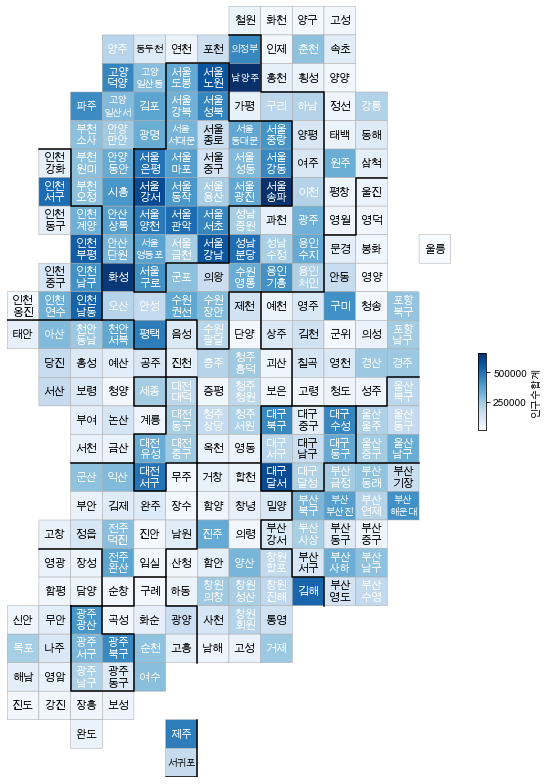

In [76]:
drawKorea("인구수합계", pop, "Blues")

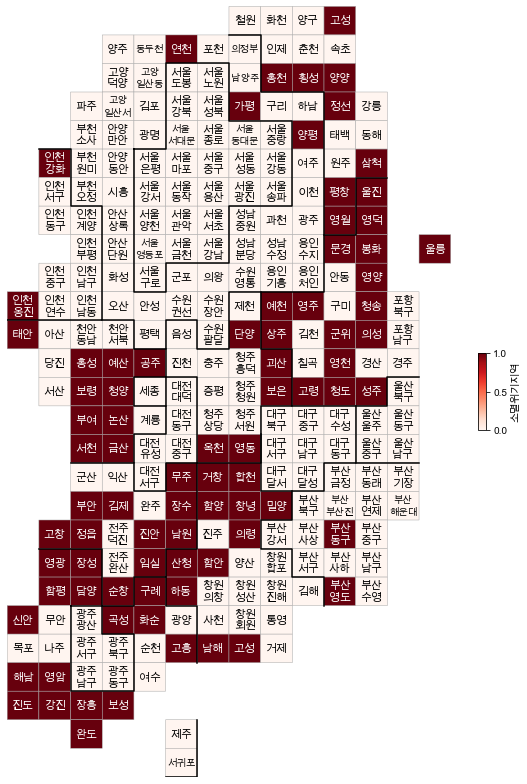

In [77]:
pop["소멸위기지역"] = [1 if con else 0 for con in pop["소멸위기지역"]] #True : 1 , False : 0으로 바꿔줌
drawKorea("소멸위기지역", pop, "Reds")

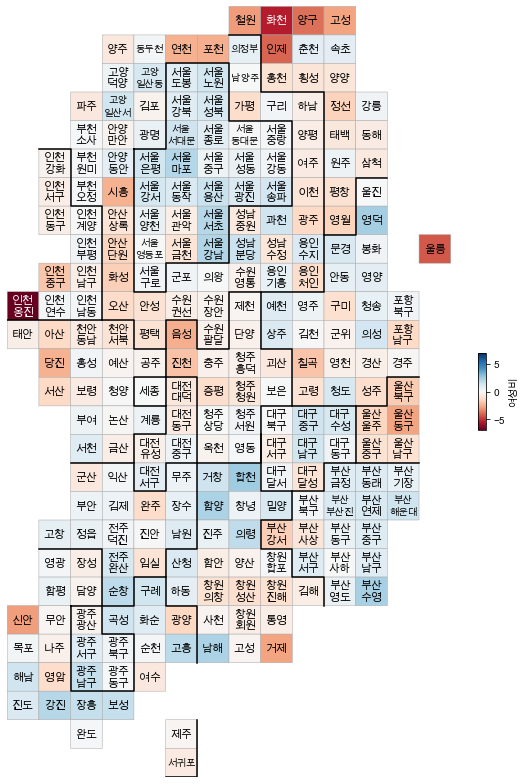

In [78]:
pop["여성비"] = (pop["인구수여자"] / pop["인구수합계"] - 0.5) * 100
drawKorea("여성비" , pop, "RdBu", zeroCenter = True)

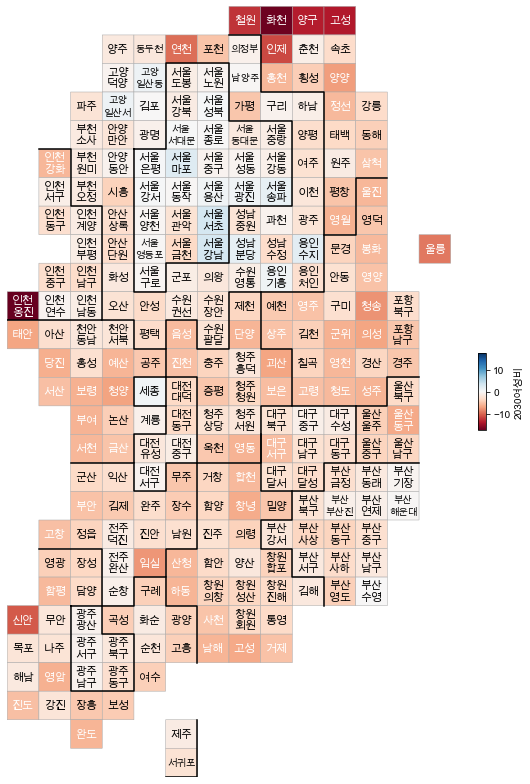

In [79]:
pop["2030여성비"] = (pop["20-39세여자"] / pop["20-39세합계"] - 0.5) * 100
drawKorea("2030여성비" , pop, "RdBu", zeroCenter = True)

### folium

In [80]:
import folium
import json

pop_folium = pop.set_index("ID")
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37449.0,106231.0,107615.0,213846.0,1.233571,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7094.0,15899.0,14215.0,30114.0,0.712997,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15058.0,47166.0,46131.0,93297.0,1.295391,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14550.0,35253.0,34346.0,69599.0,0.978007,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12694.0,40288.0,41505.0,81793.0,1.378919,0,1,10,0.743951,-3.217875


In [81]:
geo_path = "../data/07_skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = "utf-8"))

# 인구수 합계 시각화
mymap = folium.Map(location = [36.2002,127.054], zoom_start = 7)
mymap.choropleth(
    geo_data = geo_str,
    data = pop_folium["인구수합계"],
    key_on = "feature.id",
    columns = [pop_folium.index, pop_folium["인구수합계"]],
    fill_color = "YlGnBu"
)

mymap

In [82]:
# 소멸 위기 지역 시각화

mymap = folium.Map(location = [36.2002,127.054], zoom_start = 7)
mymap.choropleth(
    geo_data = geo_str,
    data = pop_folium["소멸위기지역"],
    key_on = "feature.id",
    columns = [pop_folium.index, pop_folium["소멸위기지역"]],
    fill_color = "PuRd"
)

mymap

In [83]:
# 데이터 저장

draw_korea.to_csv("../data/07_draw_korea.csv", encoding = "utf-8", sep = ",")